In [8]:
import torchvision

image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)
celeba_valid_dataset = torchvision.datasets.CelebA(image_path, split='valid', target_type='attr', download=False)
celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test', target_type='attr', download=False)

print('훈련 세트:', len(celeba_train_dataset))
print('검증 세트:', len(celeba_valid_dataset))  
print('테스트 세트:', len(celeba_test_dataset))

훈련 세트: 162770
검증 세트: 19867
테스트 세트: 19962


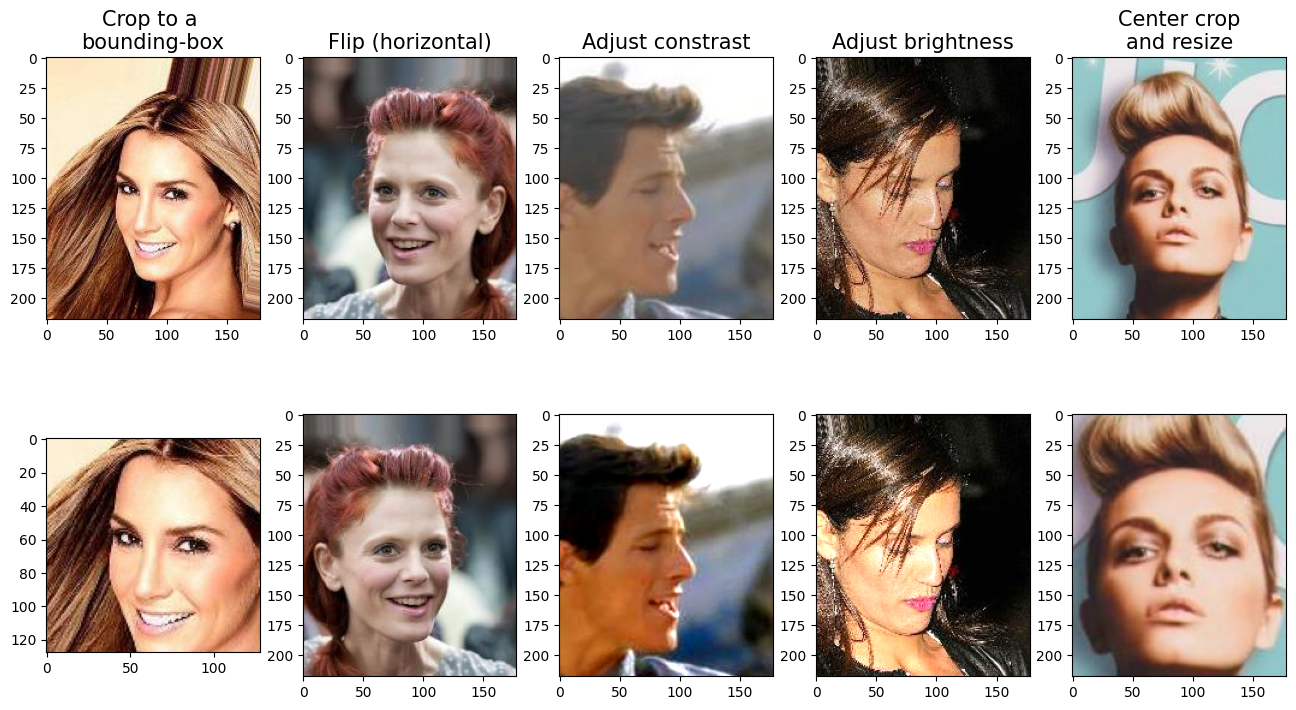

In [11]:
from torchvision import transforms
import matplotlib.pyplot as plt

## 다섯 개 샘플

fig = plt.figure(figsize=(16, 8.5))

## 1열: 바운딩 박스로 자르기
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title('Crop to a \nbounding-box', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)
ax.imshow(img_cropped)

## 2열: (수평으로) 뒤집기
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title('Flip (horizontal)', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_flipped = transforms.functional.hflip(img)
ax.imshow(img_flipped)

## 3열: 대비 조정
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[2]
ax.set_title('Adjust constrast', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_adj_contrast = transforms.functional.adjust_contrast(img, contrast_factor=2)
ax.imshow(img_adj_contrast)

## 4열: 명도 조정
ax = fig.add_subplot(2, 5, 4)
img, attr = celeba_train_dataset[3]
ax.set_title('Adjust brightness', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 9)
img_adj_brightness = transforms.functional.adjust_brightness(img, brightness_factor=1.3)
ax.imshow(img_adj_brightness)

## 5열: 이미지 중앙 자르기
ax = fig.add_subplot(2, 5, 5)
img, attr = celeba_train_dataset[4]
ax.set_title('Center crop\nand resize', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 10)
img_center_crop = transforms.functional.center_crop(img, [0.7*218, 0.7*178])
img_resized = transforms.functional.resize(img_center_crop, size=(218, 178))
ax.imshow(img_resized)


plt.show()

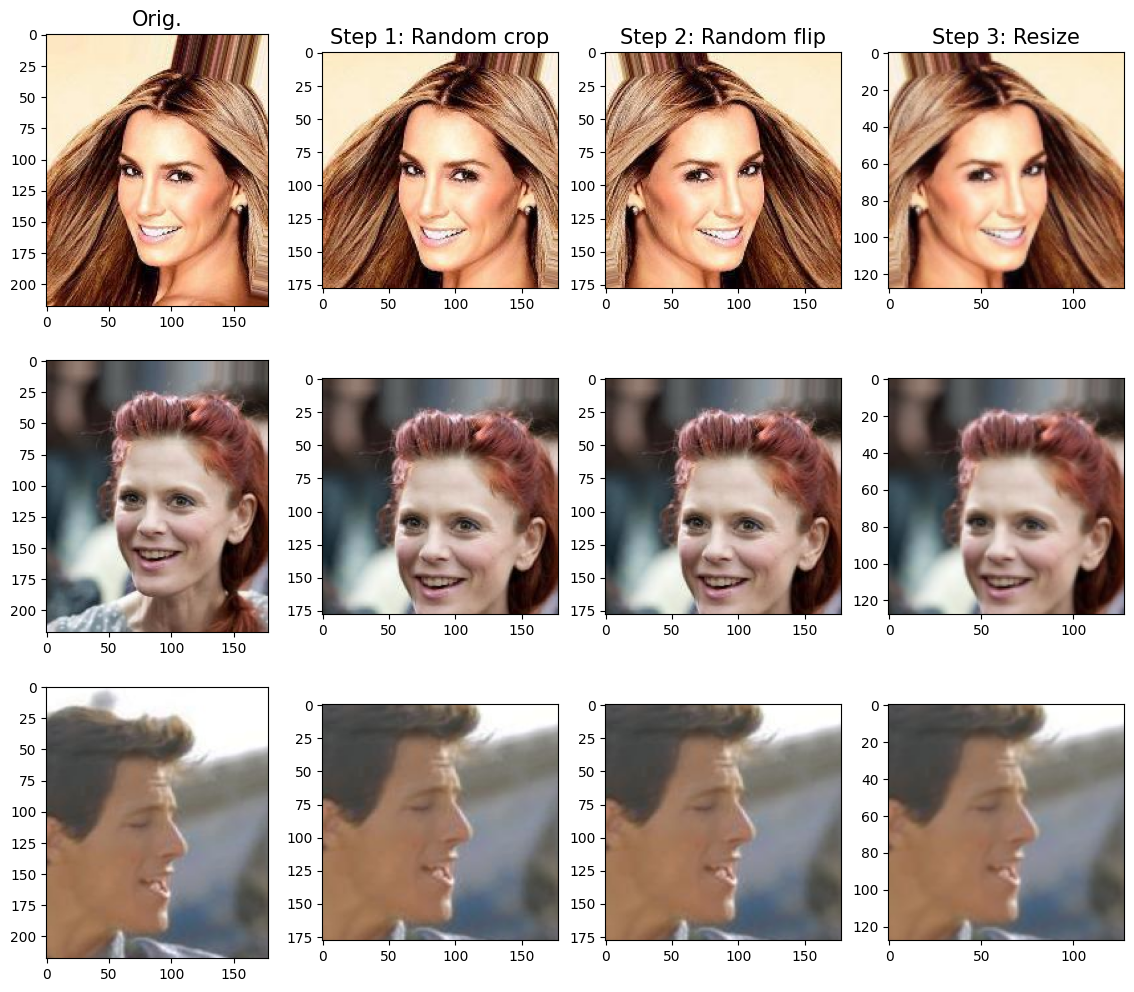

In [12]:
import torch
torch.manual_seed(1)

fig = plt.figure(figsize=(14, 12))

for i, (img, attr) in enumerate(celeba_train_dataset):
    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(img)
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)
    img_transform = transforms.Compose([transforms.RandomCrop([178, 178])])
    img_cropped = img_transform(img)
    ax.imshow(img_cropped)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
    img_flip = img_transform(img_cropped)
    ax.imshow(img_flip)
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resized = transforms.functional.resize(img_flip, size=(128, 128))
    ax.imshow(img_resized)
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)

    if i == 2:
        break

# plt.savefig('figures/14_15.png', dpi=300)
plt.show()

In [13]:
get_smile = lambda attr: attr[31]

transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
])

In [23]:
from torch.utils.data import DataLoader

celeba_train_dataset = torchvision.datasets.CelebA(image_path,
                                                   split='train',
                                                   target_type='attr',
                                                   download=True,
                                                   transform=transform_train,
                                                   target_transform=get_smile)

torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=2)

fig = plt.figure(figsize=(15, 6))

num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))


#plt.savefig('figures/14_16.png', dpi=300)
plt.show()

2422.0 bytes
c:\ProgramData\anaconda3\envs\dl_dev\lib\site-packages\torchvision\datasets\utils.py:260: UserWarning: We detected some HTML elements in the downloaded file. This most likely means that the download triggered an unhandled API response by GDrive. Please report this to torchvision at https://github.com/pytorch/vision/issues including the response:

<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="mfiijnyzyGfYgWzi9iH6eg">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial,sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-e

RuntimeError: The MD5 checksum of the download file ./data\celeba\img_align_celeba.zip does not match the one on record.Please delete the file and try again. If the issue persists, please report this to torchvision at https://github.com/pytorch/vision/issues.

In [19]:
from torch.utils.data import DataLoader

celeba_train_dataset = torchvision.datasets.CelebA(image_path,
                                                   split='train',
                                                   target_type='attr',
                                                   download=False,
                                                   transform=transform_train,
                                                   target_transform=get_smile)

torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=2)

fig = plt.figure(figsize=(15, 6))

num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))


#plt.savefig('figures/14_16.png', dpi=300)
plt.show()

RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [ ]:
# valid, test DataLoader 
celeba_valid_dataset = torchvision.datasets.CelebA(image_path,
                                                   split='valid',
                                                   target_type='attr',
                                                   download=False,
                                                   transform=transform,
                                                   target_transform=get_smile)

celeba_test_dataset = torchvision.datasets.CelebA(image_path,
                                                   split='test',
                                                   target_type='attr',
                                                   download=False,
                                                   transform=transform,
                                                   target_transform=get_smile)

from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000))
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000))

print('훈련 세트:', len(celeba_train_dataset))
print('검증 세트:', len(celeba_valid_dataset))

In [ ]:
batch_size = 32

torch.manual_seed(1)
train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=False)

In [ ]:
# 웃는 얼굴 분류 CNN 신경망 구성
import torch.nn as nn

model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout1', nn.Dropout(p=0.5))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout2', nn.Dropout(p=0.5))

model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))

model.add_module('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())

In [ ]:
x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
model.add_module('pool4', nn.AvgPool2d(kernel_size=8))
model.add_module('flatten', nn.Flatten())

x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
model.add_module('fc', nn.Linear(256, 1))
model.add_module('sigmoid', nn.Sigmoid())
x = torch.ones((4, 3, 64, 64))
model(x).shape

In [ ]:
model

In [ ]:
# GPU 처리
# GPU 사용가능 확인 => device='cuda'
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# model => GPU 보내기
model=model.to(device)

In [ ]:
# 함수 정의 : model, num_epochs, train_dl, valid_dl, loss_fn, optimizer
def train(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer):
    loss_hist_train=[0] * num_epochs
    accuracy_hist_train=[0] * num_epochs
    loss_hist_valid=[0] * num_epochs
    accuracy_hist_valid=[0] * num_epochs
    
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch=x_batch.to(device)
            y_batch=y_batch.to(device)
            pred_batch=model(x_batch)[:,0]
            loss=loss_fn(pred_batch,y_batch.float())
            loss.backward()
            optimizer.step()
            
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            
            is_correct=((pred_batch>=0.5).float()==y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()
        
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)    
        # 여기까지가 1 에폭 학습 종료
        
        model.eval() # 평가모드 : 예측만 해야 한다
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch=x_batch.to(device)
                y_batch=y_batch.to(device)
                
                pred_batch=model(x_batch)[:,0]
                loss=loss_fn(pred_batch, y_batch.float())
                
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                
                is_correct=((pred_batch>=0.5).float()==y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()
            loss_hist_valid[epoch] /=len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /=len(valid_dl.dataset)
            
            print(f'에포크 : {epoch+1}, 학습정확도 : {accuracy_hist_train[epoch]:.4f}')
            print(f'에포크 : {epoch+1}, 검증증정확도 : {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid    

In [ ]:
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs=50

hist=train(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer)

In [ ]:
import numpy as np

x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

In [ ]:
# test data 테스트
accuracy_test = 0

model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum().cpu()

accuracy_test /= len(test_dl.dataset)

print(f'테스트 정확도: {accuracy_test:.4f}')

In [ ]:
pred = model(x_batch)[:, 0] * 100

fig = plt.figure(figsize=(15, 7))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([])
    # 데이터 이미지 차원 (색, 높이, 넓이) 
    # plt에서 이미지 차원 (높이, 넓이, 색)
    ax.imshow(x_batch[j].cpu().permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Smile'
    else:
        label = 'Not Smile'
    ax.text(
        0.5, -0.15,
        f'GT: {label:s}\nPr(Smile)={pred[j]:.0f}%',
        size=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

#plt.savefig('figures/figures-14_18.png', dpi=300)
plt.show()

In [ ]:
import os
if not os.path.exists('models'):
    os.mkdir('models')

path = 'models/celeba-cnn_acc_9121_250424.ph'
torch.save(model, path)